<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

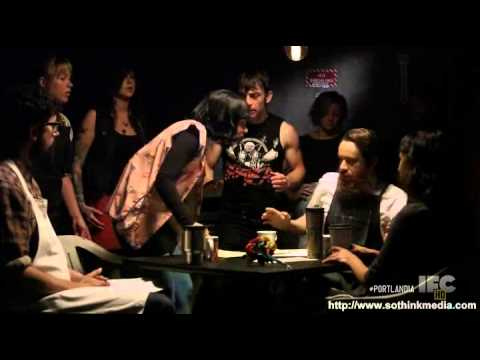

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Ravi\\Documents\\Lambda School\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [82]:
import pandas as pd

url = 'C:\\Users\\Ravi\\Documents\\Lambda School\\DS-Unit-4-Sprint-1-NLP\\module1-text-data\\data\\yelp_coffeeshop_review_data.csv'

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [83]:
# Removing strings from star_rating column
shops.star_rating = shops.star_rating.str.replace('star rating', "")
shops.star_rating = shops.star_rating.astype(float)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [84]:
# Stripping white spaces in text column
shops.full_review_text = [item.strip() for item in shops['full_review_text']]
shops.full_review_text.head()

0    11/25/2016 1 check-in Love love loved the atmo...
1    12/2/2016 Listed in Date Night: Austin, Ambian...
2    11/30/2016 1 check-in Listed in Brunch Spots I...
3    11/25/2016 Very cool decor! Good drinks Nice s...
4    12/3/2016 1 check-in They are located within t...
Name: full_review_text, dtype: object

In [85]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atmo...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambian...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots I...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice s...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within t...,4.0


In [86]:
# Function for keeping only alpha characters

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [87]:
shops.full_review_text = shops.full_review_text.apply(tokenize)
shops.full_review_text.head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: full_review_text, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [23]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [24]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [36]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text']):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [39]:
shops.tokens.head()

0    [11/25/2016, 1, check-in, Love, love, loved, t...
1    [12/2/2016, Listed, in, Date, Night:, Austin,,...
2    [11/30/2016, 1, check-in, Listed, in, Brunch, ...
3    [11/25/2016, Very, cool, decor!, Good, drinks,...
4    [12/3/2016, 1, check-in, They, are, located, w...
Name: tokens, dtype: object

In [43]:
def count(docs):
    """Courtesy -Lecture Notes"""

    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [45]:
word_count = count(shops['tokens'])
word_count

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,the,1,5,1.0,0.050505,0.050505,0.000131
24,and,1,4,2.0,0.040404,0.090909,0.000131
23,I,1,4,3.0,0.040404,0.131313,0.000131
51,of,1,3,4.0,0.030303,0.161616,0.000131
43,my,1,3,5.0,0.030303,0.191919,0.000131
...,...,...,...,...,...,...,...
7,art,1,1,73.0,0.010101,0.959596,0.000131
66,may,1,1,74.0,0.010101,0.969697,0.000131
13,be.,1,1,75.0,0.010101,0.979798,0.000131
9,Any,1,1,76.0,0.010101,0.989899,0.000131


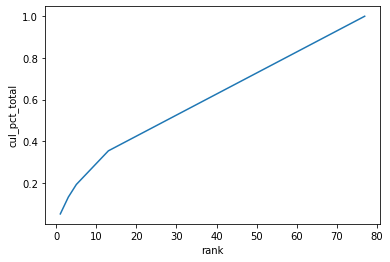

In [46]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=word_count);

The above chart and dataframe indicate many common stop words in the text. These will need to be removed for analysis.

In [56]:
# Checking list of default stop words in Spacy)
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [57]:
# Adding words to list of default stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['1','latte', 'coffee'])

In [58]:
# Updating tokens list without stop words.
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [59]:
shops.tokens.head()

0    [11/25/2016, check-in, love, love, loved, atmo...
1    [12/2/2016, listed, date, night:, austin,, amb...
2    [11/30/2016, check-in, listed, brunch, spots, ...
3    [11/25/2016, cool, decor!, good, drinks, nice,...
4    [12/3/2016, check-in, located, northcross, mal...
Name: tokens, dtype: object

In [60]:
word_count = count(shops.tokens)
word_count

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
27,love,1,2,1.0,0.043478,0.043478,0.000131
30,ordered,1,2,2.0,0.043478,0.086957,0.000131
35,"latte,",1,2,3.0,0.043478,0.130435,0.000131
37,11/25/2016,1,1,4.0,0.021739,0.152174,0.000131
9,check-in,1,1,5.0,0.021739,0.173913,0.000131
38,loved,1,1,6.0,0.021739,0.195652,0.000131
11,atmosphere!,1,1,7.0,0.021739,0.217391,0.000131
42,corner,1,1,8.0,0.021739,0.239130,0.000131
14,shop,1,1,9.0,0.021739,0.260870,0.000131
13,"style,",1,1,10.0,0.021739,0.282609,0.000131


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

